$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\vx}{\vec{x}}
\newcommand{\I}{\mathbb{I}}
$


<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# Lecture 19: Logistic Regression

Naveen Kodali and Jacob Abernethy
*Date:  Tuesday, November 6, 2018*

### Naive Bayes:  Problem

- We will use **Naive Bayes** to solve the following classification problem:
    - **Categorical** feature vector $\vx = (x_1, x_2, \dots, x_D)$ with length $D$
        - Each feature $x_d \in \{0,1\}$, $\forall d = 1, \dots, D$
        - Note: you can allow for non-binary features - $x_d \in \{0,1, \ldots M\}$
    - Predict discrete class label $y \in \{1, 2, \dots, C \}$

- For example, in **Spam Mail Classification**,
    - Predict whether an email is `SPAM` ($y=1$) or `HAM` ($y=0$)
    - Use words / metadata in the email as features
    - For simplicity, we can use **bag-of-words** features,
        - Assume fixed vocabulary $V$ of size $|V| = D$
        - Feature $x_d$, for $d \in \{1, 2, \dots, D \}$, indicates the existence of $d\text{th}$ word in the email
        - Eg. $x_d = 1$ if $d\text{th}$ word is in the email; $x_d = 0$ otherwise
        - In this case $M=2$

### Naive Bayes:  Independence Assumption and Full model

- The essence of Naive Bayes is the **conditionally independence assumption**
    $$
    P(\vx | y = c) = \prod_{d=1}^D P(x_d | y=c)
    $$
    i.e., given the label, all features are independent.
    
- The **full generative** model of Naive Bayes is:
    $$
    \begin{align}
    P(y = c ) & = \pi_c \quad \forall\, c=0,1 \\
    P(x_d = 1 | y = c ) &= \theta_{cd} \quad \forall\, d = 1,\dots,D
    \end{align}
    $$
- Parameter $\pi$ and $\theta$ are learned from training data.

### Naive Bayes: Prediction

- Given the independence assumption and full model, for some new data $\vx^{\text{new}} = (x_1^{\text{new}}, \dots, x_D^{\text{new}})$ we will classify based on
    $$
    \begin{align}
    y
    &=\underset{c \in \{0,1\}}{\arg \max} P(y=c|\vx = \vx^{\text{new}}) \\
    &=\underset{c \in \{0,1\}}{\arg \max} P(\vx = \vx^{\text{new}} | y=c) P(y=c) \\
    &=\underset{c \in \{0,1\}}{\arg \max} P(y=c) \prod \nolimits_{d=1}^{D} P(x_d = x_d^{\text{new}} | y=c) \\
    &=\boxed{\underset{c \in \{0,1\}}{\arg \max} \pi_c \prod \nolimits_{d=1}^{D} \theta_{cd}^{x_d^{\text{new}}} (1-\theta_{cd})^{1-x_d^{\text{new}}}} \\
    \end{align}
    $$
    
- So as long as we learned parameter $\pi$ and $\theta$, we could classify.

### Naive Bayes:  Maximum Likelihood


- We have alread solved the MLE for the multinomial distribution (categorical variable)! We observed that:
    $$
    \hat{\pi}_c = \frac{N_c}{N} \quad \hat{\theta}_{cd} = \frac{N_{cd}}{N_c}
    $$
    where
    - $N = $ Number of examples in $\mathcal{D}$
    - $N_c = $ Number of examples in class $c$ in $\mathcal{D}$
    - $N_{cd} = $ Number of examples in class $c$ with $x_d = 1$
    
- Intuitive Interpretation
    - The class prior $\pi$ is obtained from the density of each class $\{1, \dots, C\}$ in $\mathcal{D}$
    - The class-conditional probability $\theta_{cd}$ is obtained from the density of $x_d \in \{0,1\}$ among all examples in class $c$

## Example dataset
#### Example No.  |  Color  |  Type  |  Origin  |  Stolen?

1 | Red | Sports | Domestic | Yes <br>
2 | Red | Sports | Domestic | No <br>
3 | Red | Sports | Domestic | Yes <br>
4 | Yellow | Sports | Domestic | No <br>
5 | Yellow | Sports | Imported | Yes <br>
6 | Yellow | SUV | Imported | No <br>
7 | Yellow | SUV | Imported | Yes <br>
8 | Yellow | SUV | Domestic | No <br>
9 | Red | SUV | Imported | No <br>
10 | Red | Sports | Imported | Yes 

### Problem

What is MLE of the parameters $\theta$ and $\mu$? 

For these parameters, what is P(Yes | Red Domestic SUV) and (No | Red Domestic SUV)?

## MAP Estimation for Naive Bayes with Beta Prior

In the above example, what if we never see a red car that is stolen (perhaps because we didn't have much data)? What will be $P(\text{Stolen} | \text{Red Imported Sports})$? The predicted probability will be 0! This is not desireable, since it would essentially be "overfitting" to the data.

This is where we want a prior distribution. As we discussed previously, it's best to use a conjugate prior if you can, because the calculations are very convenient. The conjugate distribution to the binomial model is the *beta distribution*, parameterized by $\alpha, \beta > 0$:
$$P(\theta | \alpha, \beta) := \frac{\theta^{\alpha - 1}(1-\theta)^{\beta - 1}}{B(\alpha, \beta)}$$
where the normalization term $B$ is defined in terms of the [gamma function](https://en.wikipedia.org/wiki/Gamma_function), $B(\alpha, \beta) := \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$. 

### Naive Bayes:  Maximum a Posteriori


- We have alread solved the MLE for Naive Bayes:
    $$
    \hat{\pi}_c = \frac{N_c}{N} \quad \hat{\theta}_{cd} = \frac{N_{cd}}{N_c}
    $$
    where $N = $ #examples in the dataset, $N_c = $ #examples in class $c$ in dataset, $N_{cd} = $ #examples in class $c$ with $x_d = 1$
    
*Problem*: What is the MAP estimate of the parameters $\theta_{cd}$ for this model, when we assume the prior on every $\theta_{cd}$ is (independently) distributed according to $\text{Beta}(\alpha,\beta)$?
    


#### Answer

You get the "smoothed" version of the counts:
    $$
     \hat{\theta}_{cd}^{\text{MAP}(\alpha,\beta)} = \frac{N_{cd} + \alpha}{N_c + \alpha + \beta}
    $$

## Binary is to Categorical as Beta is to Dirichlet

We want to recall that the binomial model is a distribution on (counts of) *binary* variables. In the example above, all of the features $x_d$ took one of two values, and the class label YES/NO was also binary. In this case, you only need $\theta_{cd}$ for each class $c \in \{0,1\}$ and feature index $d = 1, \ldots, D$

*BUT* what if the features and classes can take one of more than two classes? In this case, we would assume our features and classes are *categorical* variables, and we would use the *multinomial* distribution to model them. If $X$ is a categorical variable with parameter vector $q$, then $P(X = j|q) = q_j$.

The Beta prior is the "good" prior for the binomial distribution. For the categorical, it's the *Dirichlet* distribution. Let $q \in \Delta_K$ be some probability distribution on $K$ classes. Given parameters $\alpha_1, \ldots, \alpha_K$, the Dirichlet distribution for $\vec \alpha$ has PDF:
$$P_{\vec \alpha}(q) := \frac{1}{B(\vec \alpha)} \prod_{i=1}^K q_i^{\alpha_i - 1}$$
where $B(\vec \alpha) := \frac{\prod_{i=1}^K \Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^K \alpha_i)}$.

## Classification Part 2: Logistic Regression

## Our models so far:

+ Linear regression
    + Tries to find a model to predict $y$ from $x \in \R^d$, with parameters $\theta \in \R^d$
    + The variable $y$ is a *real* number
    + Model assumes that $y$ is Gaussian with mean $x^\top \theta$ and variance $\sigma^2$
    + Model does **not** treat $x$ as a random variable
+ Naive Bayes
    + Tries to find a model to predict $y$ from $x$, with parameters $\theta, \mu$
    + (Typically) the variable $y$ is a *categorical* variable
    + (Typically) the coordinates of $x$ are *categorical* variables
    + Model **does** treat $x$ as a random variable
    + The model makes the (somewhat unusual) assumption that features $x = (x_1, \ldots, x_D)$ are *independent once we condition on $y$*


## New Model: Logistic Regression

+ Logistic regression
    + Tries to find a model to predict $y$ from $x \in \R^d$, with parameters $\theta \in \R^d$
    + Model assumes that variable $y$ is a *categorical* variable with parameters $q$
    + The prediction for $y$ is a probability distribution $q = P(y=1|x,\theta), \ldots, P(y=K|x,\theta)$
    + Model does **not** treat $x$ as a random variable
    + Despite the name, LR is really a *classification* algorithm, not a regression alg

## The likelihood model for Logistic Regression

In this lecture, let us assume that the categorical label $y$ is *binary*, indeed $y \in \{-1,1\}$, just to make things easier. But it is not hard to generalize this to multiclass (categorical > 2) settings.

Given input $x$ and parameters $\theta$, the prediction for $y$ can be viewed as a probability $q$ where
$$q := P(y = 1 | x, \theta) = \frac{1}{1 + \exp(-x^\top \theta)} = \frac{\exp(x^\top \theta)}{1 + \exp(x^\top \theta)}.$$

What's going on here? The problem is that $\theta^\top x$ is not guaranteed to be in $[0,1]$. We need to "squash" the real number $\theta^\top x$ into the probability space $[0,1]$. The standard way to do this is with the *sigmoid* function $\sigma(s) = \frac{1}{1 + \exp(-s)}$.

A nice property of the sigmoid: $\sigma(-s) = (1-\sigma(s))$. This is used a lot.


## Log odds ratio

It's often interesting to define what we call the *log-odds ratio* of a probability $p$ as $\log \frac{p}{1-p}$.


With this in mind, we can also state this the Logistic Regression model as follows: the *log-odds ratio* is linear in $x$. That is, we have
$$\log \frac{P(y = 1 | x, \theta)}{P(y = -1 | x, \theta)} = \theta^\top x$$

## A Challenge for LR: No closed form MLE!

The maximum likelihood estimator for the logistic regression is the following:
$$
\begin{eqnarray*}
\theta^{\text{MLE}} & := & \arg\max_{\theta \in \R^d} \sum_{i=1}^n \log P(y_i | x_i, \theta) \\
& = & \arg\max_{\theta \in \R^d} \sum_{i=1}^n \log \left(\sigma(x_i^\top \theta)^{\mathbb{I}(y_i = 1)}(1-\sigma(x_i^\top \theta))^{\mathbb{I}(y_i = -1)}\right) \\
& = & \arg\max_{\theta \in \R^d} \sum_{i=1}^n \log \sigma(y_i(x_i^\top \theta))
\end{eqnarray*}
$$


If we define $h(x) = \sigma(x^T\theta)$, with some algebra, we can alternatively write down the loss for logistic regression as:
$$L(\theta) = \sum_{i=1}^{m} (−y_i \log(h(x_i)) − (1−y_i) \log(1−h(x_i)))$$

### Exercise: 

Derive the gradient of the loss function above and what would the GD/SGD steps look like?

Full Gradient matrix form: $\nabla_{\theta} L(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h(x_i)−y_i) x_i$

SGD Step co-ord wise: $\theta_j = \theta_j − \alpha(h(x_i)−y_i)x_i^j$

### Exercise: 

Derive the Hessian of the loss function above and what would the Newton's method step look like?

$H = \frac{1}{m} \sum_{i=1}^{m} \left[ h(x_i)(1−h(x_i)) x_i x_i^T \right]$
    
Newton Step: $\theta = \theta − H^{−1} \nabla_\theta L(\theta)$

Does this work?

In [1]:
!wget https://raw.githubusercontent.com/cs4540-f18/cs4540-f18.github.io/master/lectures/logistic_x.txt
!wget https://raw.githubusercontent.com/cs4540-f18/cs4540-f18.github.io/master/lectures/logistic_y.txt
###If this doesnt work in Colab, just clone class repo to your computer and open the jupyter notebook

--2018-11-06 14:57:55--  https://raw.githubusercontent.com/cs4540-f18/cs4540-f18.github.io/master/lectures/logistic_x.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2399 (2.3K) [text/plain]
Saving to: ‘logistic_x.txt.1’

logistic_x.txt.1    100%[===================>]   2.34K  --.-KB/s    in 0s      

2018-11-06 14:57:56 (21.6 MB/s) - ‘logistic_x.txt.1’ saved [2399/2399]

--2018-11-06 14:57:56--  https://raw.githubusercontent.com/cs4540-f18/cs4540-f18.github.io/master/lectures/logistic_y.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1119 (1.1K) [text/plain]
Saving to: ‘logistic_y.txt.1’

logistic_y.tx

[55.5 41.  53.5 46.  41.  51.5 51.  42.  53.5 57.5 42.5 41.  46.  46.
 49.5 41.  48.5 51.5 44.5 44.  33.  33.5 31.5 33.  42.  30.  61.  49.
 26.5 34.  42.  29.5 39.5 51.5 41.5 42.5 35.  38.5 32.  46.  36.5 36.5
 24.  19.  34.5 37.5 35.5 37.  21.5 35.5 26.5 26.5 18.5 40.  32.5 39.
 43.  22.  36.  31.  38.5 40.  37.5 24.5 30.  33.  56.5 41.  49.5 34.5
 32.5 36.  27.  41.  29.5 20.  38.  18.5 16.  33.5]


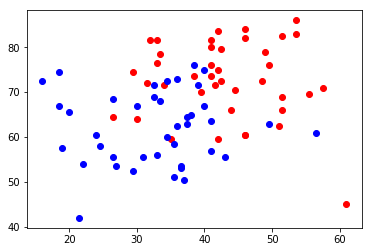

In [3]:
###Setting up ---- dont worry about this part
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

init = False
file = open('logistic_x.txt', 'rb')
for row in file:
    r = row.decode('utf8').strip().split(' ')
    if(init == False):
        x_train = np.array([[1], [np.float(r[0])], [np.float(r[len(r)-1])]])
        init = True
    else:
        x_train = np.append(x_train, [[1], [np.float(r[0])], [np.float(r[len(r)-1])]], axis=1);
init = False
file = open('logistic_y.txt', 'rb')
for row in file:
    if(init == False):
        y_train = np.array([[np.float(row.strip())]])
        init = True
    else:
        y_train = np.append(y_train, [[np.float(row.strip())]], axis=1);

m = y_train.shape[1]
theta = np.zeros((x_train.shape[0], 1))


def sigmoid(z):
 return 1/(1+np.exp(-z))

pos = np.flatnonzero(y_train == 1)
neg = np.flatnonzero(y_train == 0)

plt.plot(x_train[1, pos], x_train[2, pos], 'ro')
plt.plot(x_train[1, neg], x_train[2, neg], 'bo')

0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
[[0.]
 [0.]
 [0.]]


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


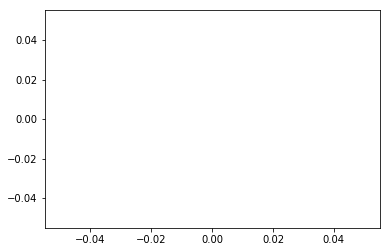

In [3]:
###Training with Newton's method which you will implement!!!!
yT = y_train.T
xT = x_train.T
#iterator 500 steps
for x in range(0, 10):
    h = sigmoid(theta.T.dot(x_train))
    error = h - y_train
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h))
    J = np.sum(tmp)/m;
    #calculate H
    #Write your line of code here
    
    #calculate gradient
    #Write your line of code here
    
    #Update theta
    #Write your lines of code here
    print(J)
    
print(theta)

plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
plt.plot(plot_x, plot_y, 'b-')

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#we read data from files line by line ------ dont worry about this part
init = False
file = open('logistic_x.txt', 'rb')
for row in file:
    r = row.decode('utf8').strip().split(' ')
    if(init == False):
        x_train = np.array([[1], [np.float(r[0])], [np.float(r[len(r)-1])]])
        init = True
    else:
        x_train = np.append(x_train, [[1], [np.float(r[0])], [np.float(r[len(r)-1])]], axis=1);
init = False
file = open('logistic_y.txt', 'rb')
for row in file:
    if(init == False):
        y_train = np.array([[np.float(row.strip())]])
        init = True
    else:
        y_train = np.append(y_train, [[np.float(row.strip())]], axis=1);

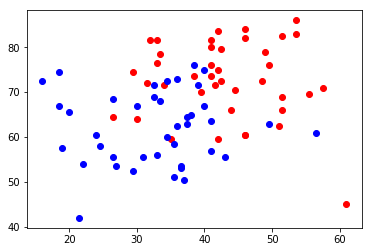

In [5]:
#number of training examples ------- dont worry about this part
m = y_train.shape[1]
#init theta
theta = np.array(np.zeros((x_train.shape[0], 1)))

#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#we find all indices that make y=1 and y=0
pos = np.flatnonzero(y_train == 1)
neg = np.flatnonzero(y_train == 0)

#plot data points
plt.plot(x_train[1, pos], x_train[2, pos], 'ro')
plt.plot(x_train[1, neg], x_train[2, neg], 'bo')    

In [6]:
###This is training part which uses SGD/GD ----- dont run this in class but later compare it against Newton's 
###method which you will implement below.
x = 0
xT = x_train.T
yT = y_train.T
preJ = 0
while True:
    J = 0
    x = x + 1;
    for i in range(0, m):
        #calculate h, error, cost function for 1 training example
        h = sigmoid(theta.T.dot(x_train[:,i].T))
        error = h.T - yT[i]
        tmp = (-1)*yT[i]*np.log(h) - (1-yT[i])*np.log((1-h))
        #accumulate cost function
        J = J + tmp
        nX = np.array([x_train[:,i]]).T
        #update theta
        theta = theta - 0.000003*(error*nX)
    J=J/m
    #just print cost function for every 1000steps
    if(x == 1000):
        x = 0
        print(J)
    if(preJ == 0):
        preJ = J
    #condition to stop learning when cost function do not decrease anymore
    if((preJ) < (J)):
        break
    else:
        preJ = J
#we got theta
print(theta)

#plot the line that separate data poits
plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
plt.plot(plot_x, plot_y, 'b-')

plt.show()

[0.66562014]
[0.66518165]
[0.66473473]
[0.66428829]
[0.66384282]
[0.66339833]
[0.66295481]


KeyboardInterrupt: 

In [ ]:
###Answers
## H = (h*(1-h)*(x_train)).dot(x_train.T)/m

## dJ = np.sum(error*x_train, axis=1)/m

###gradient = H-1.dJ
###grad = inv(H).dot(dJ)
###update theta
###theta = theta - (np.array([grad])).T

If you are not impressed, go home and try gradient descent!